# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **religious events or traditions** (see below) for the region of **Ann Arbor, Michigan, United States**, or **United States** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Ann Arbor, Michigan, United States** to Ann Arbor, USA. In that case at least one source file must be about **Ann Arbor, Michigan, United States**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Ann Arbor, Michigan, United States** and **religious events or traditions**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **religious events or traditions**?  For this category you might consider calendar events, demographic data about religion in the region and neighboring regions, participation in religious events, or how religious events relate to political events, social movements, or historical events.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

# Region and Domain Category of Data Sets

Australia

Religion

# Research Question about Domain Category

How have the number of believers of different Christian denominations in Australia change from 1986 to 2016?

# Links

https://www.abs.gov.au/AUSSTATS/abs@.nsf/Lookup/1301.0Feature+Article7012009%E2%80%9310

https://en.wikipedia.org/wiki/Religion_in_Australia

# Image

In [1]:
# Import packages and 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Load csv data
df_86_06 = pd.read_csv('census_1986_2006.csv')
df_16 = pd.read_csv('census_2016.csv')

In [3]:
# Have a look at the raw data
df_86_06.head()

,Religion,1986,1996,2006
0,Anglican,3723.4,3903.3,3718.3
1,Baptist,196.8,295.2,316.7
2,Catholic,4064.4,4799.0,5126.9
3,Churches of Christ,88.5,75.0,54.8
4,Jehovah's Witnesses,66.5,83.4,80.9


In [4]:
df_16.head()

,Religion,2016,Unnamed: 2
0,Buddhism,563674,NaN
1,Anglican,3101185,NaN
2,Assyrian Apostolic,13863,NaN
3,Baptist,345142,NaN
4,Brethren,17423,NaN


In [5]:
# Process both dataframes so that the data are on the same scale
df_16["2016 (thousands)"] = df_16["2016"] / 1000
df_16.drop(labels=['2016', 'Unnamed: 2'], axis=1, inplace=True)
df_16.head()

,Religion,2016 (thousands)
0,Buddhism,563.674
1,Anglican,3101.185
2,Assyrian Apostolic,13.863
3,Baptist,345.142
4,Brethren,17.423


In [6]:
df_86_06.columns = ['Religion', '1986 (thousands)', '1996 (thousands)', '2006 (thousands)']
df_86_06.head()

,Religion,1986 (thousands),1996 (thousands),2006 (thousands)
0,Anglican,3723.4,3903.3,3718.3
1,Baptist,196.8,295.2,316.7
2,Catholic,4064.4,4799.0,5126.9
3,Churches of Christ,88.5,75.0,54.8
4,Jehovah's Witnesses,66.5,83.4,80.9


In [7]:
# Merge the dataframes
df = df_86_06.merge(df_16, how="inner", on="Religion")
df

,Religion,1986 (thousands),1996 (thousands),2006 (thousands),2016 (thousands)
0,Anglican,3723.4,3903.3,3718.3,3101.185
1,Baptist,196.8,295.2,316.7,345.142
2,Catholic,4064.4,4799.0,5126.9,5291.834
3,Churches of Christ,88.5,75.0,54.8,39.621
4,Jehovah's Witnesses,66.5,83.4,80.9,82.510
5,Latter Day Saints,35.5,45.2,53.1,61.639
6,Lutheran,208.3,250.0,251.1,174.019
7,Eastern Orthodox,427.4,497.3,544.3,502.801
8,Pentecostal,107.0,174.6,219.6,260.558
9,Presbyterian and Reformed Churches,560.0,675.5,596.7,526.689


In [8]:
# Drop rows that are not needed for the research question
df.drop(labels=df.index[13:], inplace=True)
df = df.set_index("Religion")
df

,1986 (thousands),1996 (thousands),2006 (thousands),2016 (thousands)
Religion,,,,
Anglican,3723.4,3903.3,3718.3,3101.185
Baptist,196.8,295.2,316.7,345.142
Catholic,4064.4,4799.0,5126.9,5291.834
Churches of Christ,88.5,75.0,54.8,39.621
Jehovah's Witnesses,66.5,83.4,80.9,82.510
Latter Day Saints,35.5,45.2,53.1,61.639
Lutheran,208.3,250.0,251.1,174.019
Eastern Orthodox,427.4,497.3,544.3,502.801
Pentecostal,107.0,174.6,219.6,260.558


In [9]:
# Sort the data
df = df.sort_values(by=["1986 (thousands)", "1996 (thousands)", "2006 (thousands)", "2016 (thousands)"], ascending=False)
df.head()

,1986 (thousands),1996 (thousands),2006 (thousands),2016 (thousands)
Religion,,,,
Catholic,4064.4,4799.0,5126.9,5291.834
Anglican,3723.4,3903.3,3718.3,3101.185
Uniting Church,1182.3,1334.9,1135.4,870.183
Presbyterian and Reformed Churches,560.0,675.5,596.7,526.689
Eastern Orthodox,427.4,497.3,544.3,502.801


In [10]:
# Settings for figures
print(plt.style.available)
plt.style.use('seaborn-colorblind')
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['legend.fontsize'] = 15
plt.rcParams['axes.titlepad'] = 20

['grayscale', 'seaborn-colorblind', 'seaborn-bright', 'seaborn-deep', 'seaborn-pastel', 'classic', 'seaborn-muted', 'seaborn-darkgrid', 'seaborn-white', 'seaborn-paper', 'seaborn-dark', 'seaborn-whitegrid', 'dark_background', 'seaborn-poster', 'ggplot', 'seaborn-ticks', 'seaborn-dark-palette', 'seaborn-notebook', 'bmh', 'seaborn-talk', 'fivethirtyeight', 'seaborn']


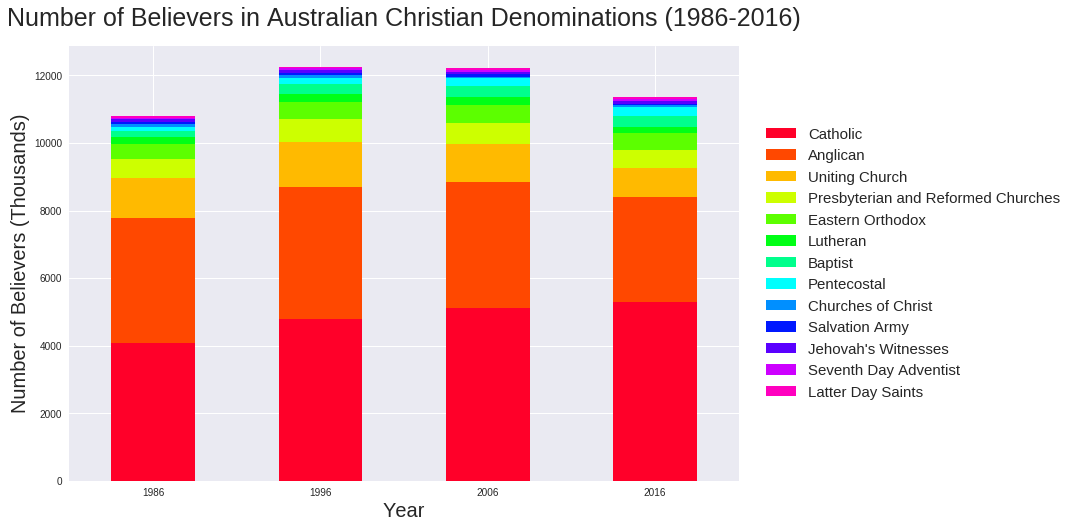

In [11]:
# Bar plot
plt.figure()
df.T.plot(kind='bar', stacked=True, colormap="gist_rainbow")
plt.title('Number of Believers in Australian Christian Denominations (1986-2016)', {'fontsize': 25})
plt.xlabel('Year', {'fontsize': 20})
plt.ylabel('Number of Believers (Thousands)', {'fontsize': 20})
plt.legend(loc='right', bbox_to_anchor=(1.5, 0.5))
plt.xticks([0, 1, 2, 3], [1986, 1996, 2006, 2016], rotation=0)
plt.tick_params(axis='both', which='major', labelsize='medium')
plt.show()

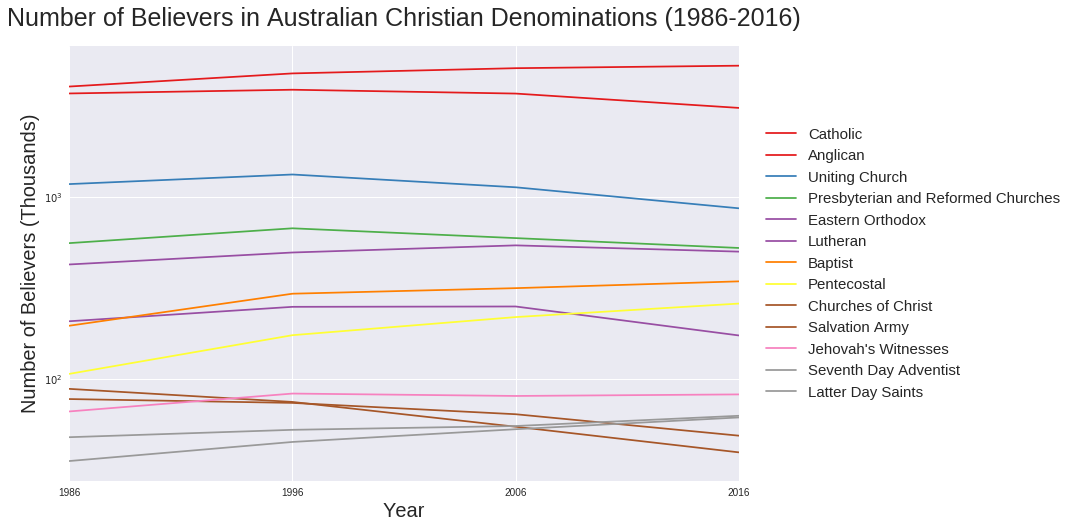

In [12]:
# Line plot
plt.figure()
df.T.plot(kind='line', colormap="Set1")
plt.title('Number of Believers in Australian Christian Denominations (1986-2016)', {'fontsize': 25})
plt.xlabel('Year', {'fontsize': 20})
plt.ylabel('Number of Believers (Thousands)', {'fontsize': 20})
plt.legend(loc='right', bbox_to_anchor=(1.5, 0.5))
plt.xticks([0, 1, 2, 3], [1986, 1996, 2006, 2016], rotation=0)
plt.yscale('log')
plt.tick_params(axis='both', which='major', labelsize='medium')
plt.show()

# Justification of how the visualisation addresses the research question

This visualization was concerned with answering the question of how number of believers of different Christian denominations in Australia change from 1986 to 2016. Data regarding the religions of Australians were obtained from Wikipedia and Australian Bureau of Statistics. Any non-Christian religions were dropped from the analysis. A bar plot and a line plot were presented in this document. Due to the relatively small amount of data available (4 collections of census data), a bar plot is favored for presentation of the number of believers in each denomination. However, it is difficult to interpret the trend from a bar and hence why a line plot was included as well.

The plots aim to show the trend of the number of believers for each Christian denomination during the period 1986 to 2016, with data collected every 10 years in between. The bar plot clearly shows that majority of Christians in Australia are Catholics, followed by Anglicans, Uniting Church, Presbyterian and Reformed Churches, and Eastern Orthodox Churches. The trend could be seen clearer through the line plot. The Catholics is the only denomination among the five largest mentioned above which shows a monotonic increase in number of belivers over 30 years (not-knowing the statistics of the years in between). The other major denominations have exhibited slight decrement in number of believers after 30 years except Eastern Orthodox Churches.

In a nutshell, the plots have managed to show us the general trend of the number of believers among the Christian denominations in Australia.

In [13]:
# help(pd.DataFrame.plot)
# help(plt.yscale)
# help(pd.DataFrame.merge)